Dataset Loaded Successfully
    Airline   Source Destination  Total_Stops  Duration  Days_Left     Class  \
0  SpiceJet  Kolkata     Chennai            0       2.0          5   Economy   
1    Indigo   Mumbai   Bangalore            0       2.9          3   Economy   
2  SpiceJet    Delhi     Chennai            2       4.9         23  Business   
3    Indigo  Chennai   Bangalore            0       5.7          6   Economy   
4    Indigo  Chennai       Delhi            0       2.7          1   Economy   

   Price  
0   7136  
1   8021  
2  10706  
3   9219  
4   8062   

-->Linear Regression Results:
MSE: 176653.06
MAE: 358.58
R2 Score: 0.9747


-->Polynomial Regression Results
R-squared (R2): 0.9913
Root Mean Squared Error (RMSE): 245.96
Mean Absolute Error (MAE): 205.22


-->Ridge Regression Results:
MSE: 176095.78
MAE: 357.77
R2 Score: 0.9747

-->Lasso Regression Results:
MSE: 176581.15
MAE: 358.40
R2 Score: 0.9747

Future Flight Price Predictions:

  Airline    Source Destination  T

,Model,R² Score,MSE,MAE
0,Polynomial Regression,0.991325,60494.566375,205.21909


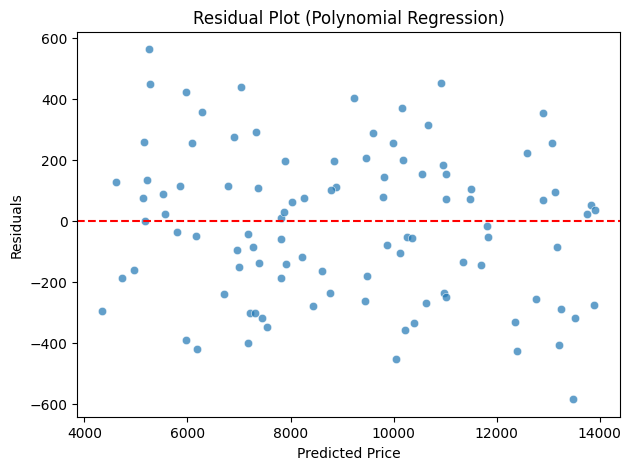

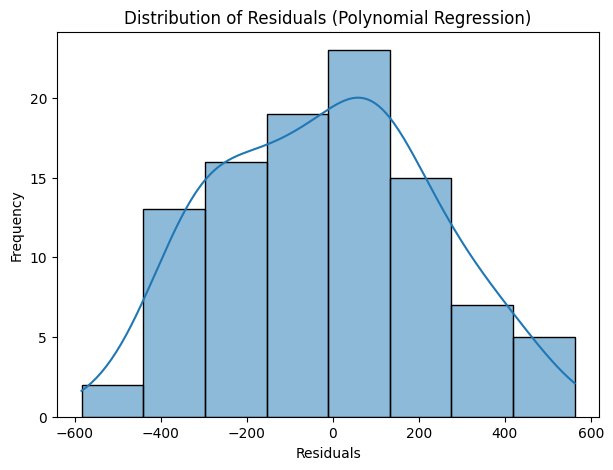

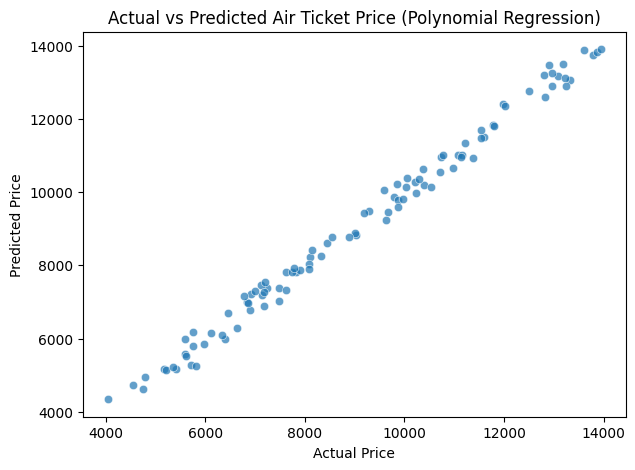

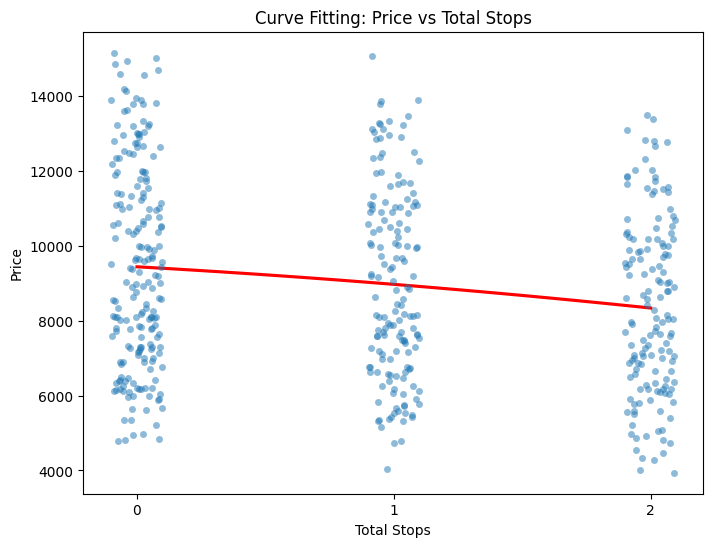

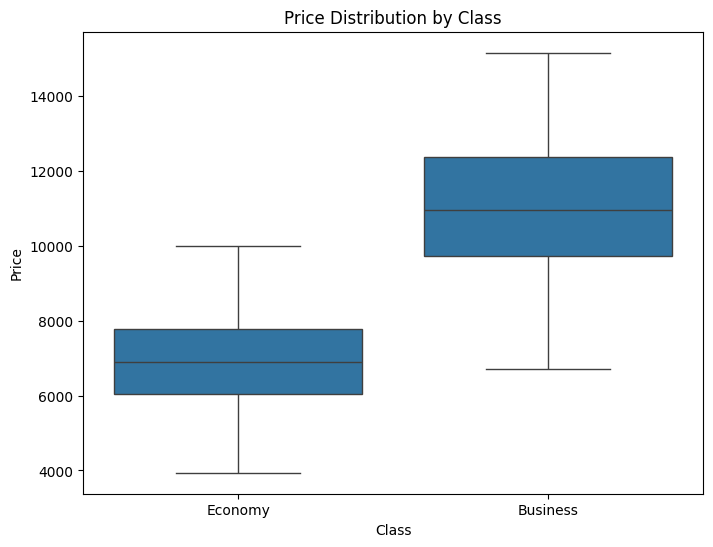

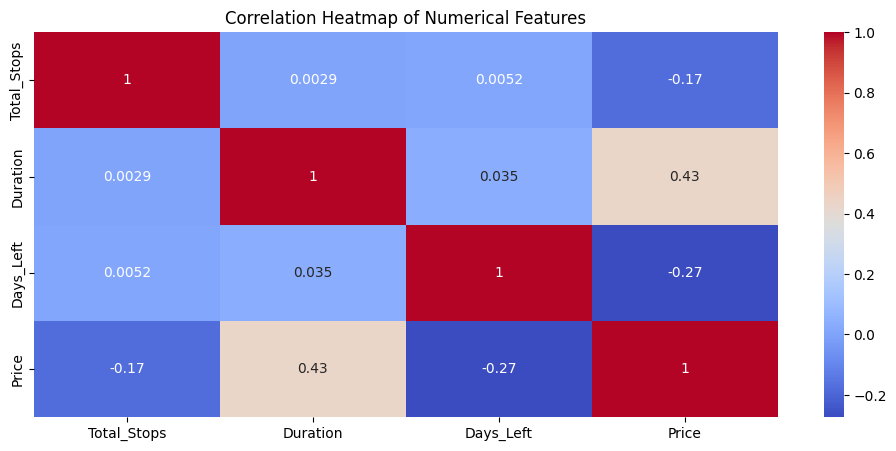

In [ ]:

# PROJECT: AIR TICKET PRICE PREDICTION (No Loops)
# MODELS: Linear Regression, Ridge Regression, Lasso Regression

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 1. Load Dataset
file_path = "D:/EDM/Air_Ticket_Price.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully")
print(df.head(), "\n")

# 2. Define Features (X) and Target (y)
X = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Duration', 'Days_Left', 'Class']]
y = df['Price']

# Separate categorical and numerical columns
cat_cols = ['Airline', 'Source', 'Destination', 'Class']
num_cols = ['Total_Stops', 'Duration', 'Days_Left']

# 3. Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# LINEAR REGRESSION MODEL
linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("-->Linear Regression Results:")
print(f"MSE: {mse_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")
print(f"R2 Score: {r2_linear:.4f}\n")

# POLYNOMIAL REGRESSION MODEL
print("\n-->Polynomial Regression Results")
poly_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"R-squared (R2): {r2_poly:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")

# RIDGE REGRESSION MODEL
print("\n")
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("-->Ridge Regression Results:")
print(f"MSE: {mse_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")
print(f"R2 Score: {r2_ridge:.4f}\n")

# LASSO REGRESSION MODEL
lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=2000))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("-->Lasso Regression Results:")
print(f"MSE: {mse_lasso:.2f}")
print(f"MAE: {mae_lasso:.2f}")
print(f"R2 Score: {r2_lasso:.4f}\n")


# FUTURE FLIGHT PRICE PREDICTIONS
future_data = pd.DataFrame({
    'Airline': ['IndiGo', 'Air India', 'SpiceJet'],
    'Source': ['Delhi', 'Mumbai', 'Bangalore'],
    'Destination': ['Cochin', 'Delhi', 'Hyderabad'],
    'Total_Stops': [1, 2, 0],
    'Duration': [180, 240, 90],
    'Days_Left': [12, 25, 3],
    'Class': ['Economy', 'Business', 'Economy']
})

future_pred = poly_pipeline.predict(future_data)
future_data['Predicted_Price'] = np.round(future_pred, 2)

print("Future Flight Price Predictions:\n")
print(future_data.to_string(index=False), "\n")

summary = pd.DataFrame({
    'Model': ['Polynomial Regression'], # Kept only Polynomial Regression
    'R² Score': [r2_poly], # Kept only r2_poly
    'MSE': [mse_poly], # Kept only mse_poly
    'MAE': [mae_poly] # Kept only mae_poly
})
display(summary)


# Analyze Residuals
residuals = y_test - y_pred_poly

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_poly, y=residuals, alpha=0.7)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

print("\n")
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals (Polynomial Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Step 13: Actual vs Predicted plot for Polynomial Regression
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.7) # Using y_pred_poly from the last executed cell
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Air Ticket Price (Polynomial Regression)")
plt.show()

# Curve fitting for Price vs. Total_Stops (using stripplot and regplot for clarity)
plt.figure(figsize=(8, 6))
sns.stripplot(x='Total_Stops', y='Price', data=df, alpha=0.5, jitter=True)
sns.regplot(x='Total_Stops', y='Price', data=df, order=2, ci=None, scatter=False, color='red') # Added order=2 for potential curve
plt.title('Curve Fitting: Price vs Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()


# Curve fitting for Price vs. Class (using boxplot and adding a regplot might not be meaningful for categorical)
# We can visualize the mean/median price for each class instead or use a different plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Price', data=df, order=['Economy', 'Business'])
plt.title('Price Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

# Heatmap of numerical features
plt.figure(figsize=(12, 5))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
